In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import plotly.express as px 


In [345]:
df = pd.read_csv('data/Country-data.csv')
countries = df['country'].tolist()
df = df.drop(['country'], axis=1)

## Correlation

<AxesSubplot:>

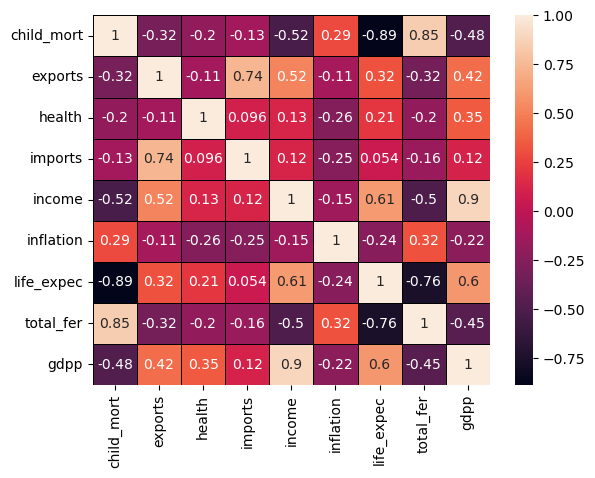

In [346]:
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='rocket', linewidths=0.5, linecolor='black')
#sns.heatmap(df.corr(method='kendall'), annot=True, cmap='rocket', linewidths=0.5, linecolor='black')#
#sns.heatmap(df.corr(method='spearman'), annot=True, cmap='rocket', linewidths=0.5, linecolor='black')#

In [347]:
# mix max scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df) # numpy array

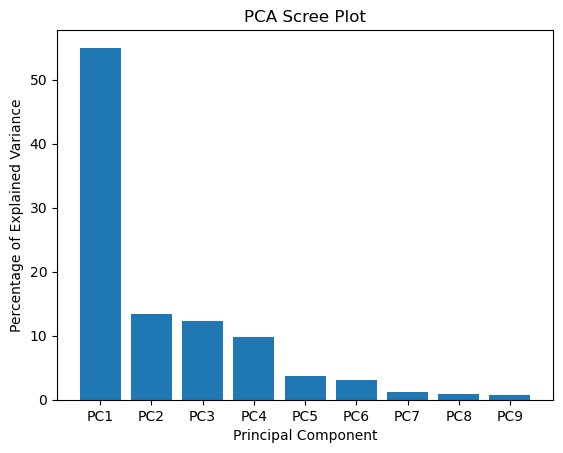

90.44% of the variance is explained by the first 4 principal components


In [348]:
pca = PCA() # create a PCA object with all components
pca.fit_transform(scaled_data) # fit the data to the PCA object and transform it and applying the dimensionality reduction on it.

scree = list(pca.explained_variance_ratio_*100) # get variance ratios
labels = ['PC' + str(x) for x in range(1, len(scree)+1)] # make labels for scree plot

# plot the percentage of explained variance by principal component
plt.bar(x=range(1,len(scree)+1), height=scree, tick_label = labels) 
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
print(f'{round(sum(scree[:4]),2)}% of the variance is explained by the first 4 principal components')

In [349]:
pca = PCA(n_components=4) # create a PCA object 
X = pca.fit_transform(scaled_data) # do the math
df = pd.DataFrame(X, columns=['PC1', 'PC2', 'PC3', 'PC4']) # make a dataframe of the PCA coordinates
df.index = countries # label the rows using country names

3D PCA

In [350]:
fig = px.scatter_3d(x=df.PC4, y=df.PC2, z=df.PC3, opacity=0.7, color=df.PC1)
fig.update_traces(mode="markers", hovertemplate=countries)
fig.show()

2D PCA

In [351]:
fig = px.scatter(x=df.PC2, y=df.PC3, color=df.PC1, opacity=0.7)
fig.update_traces(mode="markers", hovertemplate=countries)
fig.show()

/Users/sebastian/opt/anaconda3/envs/standenv/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



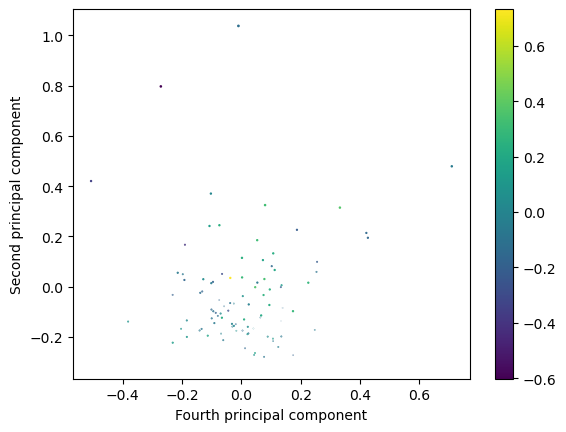

In [352]:
fig = plt.scatter(df.PC4, df.PC2, c=df.PC3, s=df.PC1)
plt.xlabel('Fourth principal component')
plt.ylabel('Second principal component')
plt.colorbar()